# Energy Consumption Pattern Analysis for Peak Detection and Efficiency Improvement

In [120]:
import pandas as pd

# 1- Read the data

In [121]:
# Load the datasets
energy_df = pd.read_csv("data/timeseries_energy_power.csv")
peaks_df = pd.read_csv("data/summer_peaks.csv")

# Display first 5 rows
print("Energy Consumption Data:")
display(energy_df.head())

print("\nSummer Peaks Data:")
display(peaks_df.head())


Energy Consumption Data:


,year,dt,energy,power
0,2018,2018-01-01T00:00:00Z,157.6,630.4
1,2018,2018-01-01T00:15:00Z,162.8,651.2
2,2018,2018-01-01T00:30:00Z,155.6,622.4
3,2018,2018-01-01T00:45:00Z,161.6,646.4
4,2018,2018-01-01T01:00:00Z,156.0,624.0



Summer Peaks Data:


,day,wd,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,energy,peak_power,peak_duration,peak_intensity,is_peak,activity
0,2018-06-01,5,16.80,15.96,15.81,15.48,15.32,18.27,22.62,24.72,25.54,26.43,25235.6,1473.6,0,0.0,False,0.60
1,2018-06-02,6,14.81,14.35,13.62,13.31,13.53,18.24,21.04,24.39,27.00,27.34,21944.8,1140.8,0,0.0,False,0.01
2,2018-06-03,7,14.74,14.65,14.28,13.89,13.65,18.47,21.62,24.64,26.16,26.64,21521.6,1097.6,0,0.0,False,0.10
3,2018-06-04,1,14.75,13.93,13.49,13.13,13.51,19.29,22.03,25.57,27.60,28.62,25397.6,1467.2,0,0.0,False,1.00
4,2018-06-05,2,16.86,17.44,16.75,15.83,15.37,18.04,21.21,25.59,25.18,26.89,24474.8,1494.4,0,0.0,False,1.00


# 2- Understanding the data

In [122]:
# Check basic info (column names, data types, missing values)
print("Energy Data Info:")
print(energy_df.info())

print("\nSummer Peaks Data Info:")
print(peaks_df.info())

Energy Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164860 entries, 0 to 164859
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    164860 non-null  int64  
 1   dt      164860 non-null  object 
 2   energy  164860 non-null  float64
 3   power   164860 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.0+ MB
None

Summer Peaks Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day             589 non-null    object 
 1   wd              589 non-null    int64  
 2   T1              589 non-null    float64
 3   T2              589 non-null    float64
 4   T3              589 non-null    float64
 5   T4              589 non-null    float64
 6   T5              589 non-null    float64
 7   T6              588 non-null    float

In [123]:
# Check and clean column names
energy_df.columns = energy_df.columns.str.strip()
peaks_df.columns = peaks_df.columns.str.strip()

# Ensure 'dt' and 'day' exist before conversion
if 'dt' in energy_df.columns:
    energy_df['dt'] = pd.to_datetime(energy_df['dt'])

if 'day' in peaks_df.columns:
    peaks_df['day'] = pd.to_datetime(peaks_df['day'])

# Reset index if 'dt' was previously set as an index
if energy_df.index.name == 'dt':
    energy_df.reset_index(inplace=True)

if peaks_df.index.name == 'day':
    peaks_df.reset_index(inplace=True)

# Set DateTime as index
energy_df.set_index('dt', inplace=True)
peaks_df.set_index('day', inplace=True)

# Verify changes
print(energy_df.info())
print(peaks_df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 164860 entries, 2018-01-01 00:00:00+00:00 to 2022-09-22 13:45:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    164860 non-null  int64  
 1   energy  164860 non-null  float64
 2   power   164860 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 5.0 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2018-06-01 to 2022-09-15
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wd              589 non-null    int64  
 1   T1              589 non-null    float64
 2   T2              589 non-null    float64
 3   T3              589 non-null    float64
 4   T4              589 non-null    float64
 5   T5              589 non-null    float64
 6   T6              588 non-null    float64
 7   T7              588 non-null    float64
 8   T8              588 

In [124]:
#  Check for Missing Values
print("Missing values in Energy Data:\n", energy_df.isnull().sum())
print("\nMissing values in Summer Peaks Data:\n", peaks_df.isnull().sum())


Missing values in Energy Data:
 year      0
energy    0
power     0
dtype: int64

Missing values in Summer Peaks Data:
 wd                0
T1                0
T2                0
T3                0
T4                0
T5                0
T6                1
T7                1
T8                1
T9                1
T10               1
energy            0
peak_power        0
peak_duration     0
peak_intensity    0
is_peak           0
activity          0
dtype: int64


In [125]:
#Inspect the Missing Values
print(peaks_df[peaks_df.isnull().any(axis=1)])


            wd     T1     T2    T3     T4     T5  T6  T7  T8  T9  T10  \
day                                                                     
2022-09-03   6  14.78  16.81  16.6  15.89  14.96 NaN NaN NaN NaN  NaN   

             energy  peak_power  peak_duration  peak_intensity  is_peak  \
day                                                                       
2022-09-03  14940.0       720.0              0             0.0    False   

            activity  
day                   
2022-09-03       0.1  


In [126]:
#Fill with the Mean of Each Column
for col in ['T6', 'T7', 'T8', 'T9', 'T10']:
    peaks_df.loc[:, col] = peaks_df[col].fillna(peaks_df[col].mean())  # Avoid chained assignment


In [127]:
# recheck
print(peaks_df.isnull().sum())


wd                0
T1                0
T2                0
T3                0
T4                0
T5                0
T6                0
T7                0
T8                0
T9                0
T10               0
energy            0
peak_power        0
peak_duration     0
peak_intensity    0
is_peak           0
activity          0
dtype: int64


# 3- Visualize Energy Consumption Trends 

In [128]:
import matplotlib.pyplot as plt

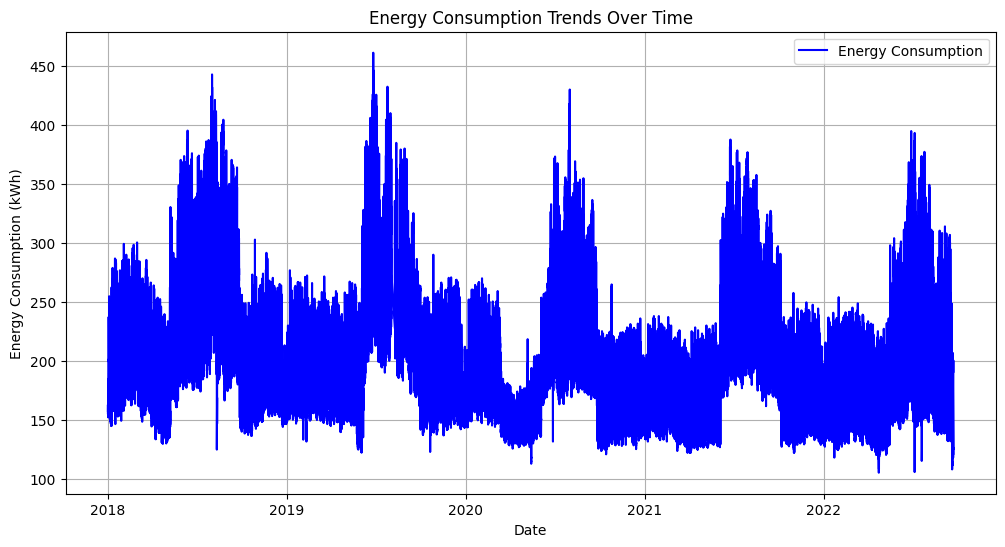

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(energy_df.index, energy_df['energy'], label='Energy Consumption', color='blue')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Trends Over Time')
plt.legend()
plt.grid(True)
plt.savefig("results/Energy_Consumption_Trends_Over_Time.jpg", dpi=300)  # Save as high-resolution JPG
plt.show()

# 4- Cluster Buildings Using K-Means

In [130]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

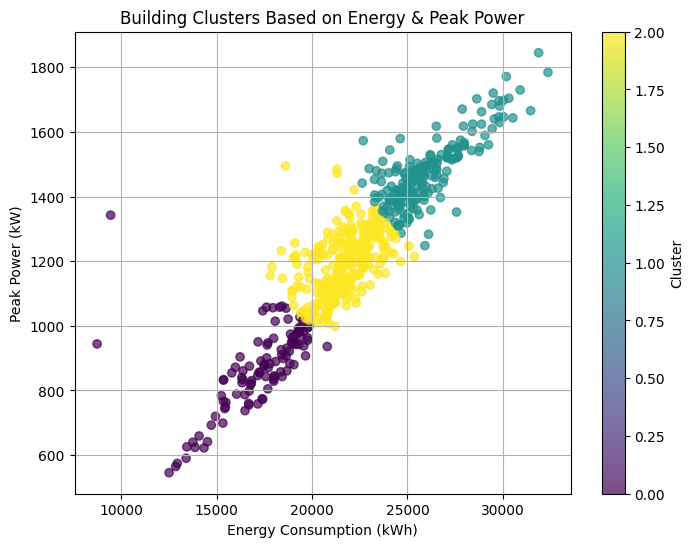

In [131]:
# Select features for clustering
features = peaks_df[['energy', 'peak_power']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # 3 clusters
peaks_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(peaks_df['energy'], peaks_df['peak_power'], c=peaks_df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Peak Power (kW)')
plt.title('Building Clusters Based on Energy & Peak Power')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.savefig("results/Clusters_Energy_&_Peak_Power.jpg", dpi=300)  # Save as high-resolution JPG
plt.show()

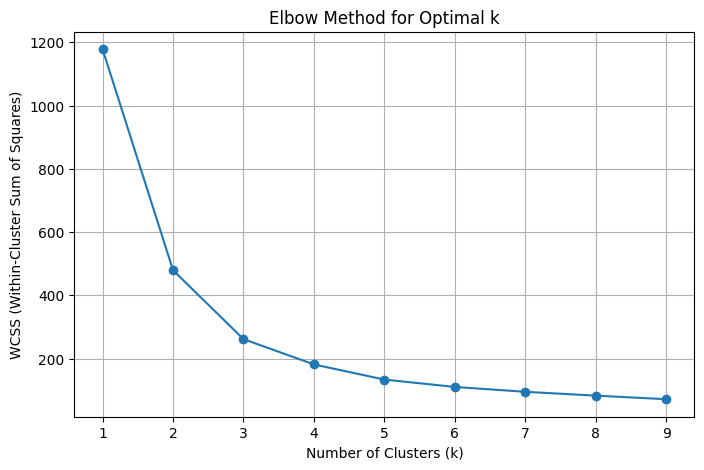

In [132]:
from sklearn.cluster import KMeans

wcss = []  # Within-Cluster Sum of Squares

# Try different values of k (e.g., 1 to 10)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


In [133]:
from sklearn.metrics import silhouette_score
import numpy as np

# Define range of k values to test
k_values = [2, 3, 4, 5]

# Store silhouette scores
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    # Compute Silhouette Score
    score = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Find the best k
best_k = k_values[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: k={best_k}")


Silhouette Score for k=2: 0.4976
Silhouette Score for k=3: 0.4936
Silhouette Score for k=4: 0.4399
Silhouette Score for k=5: 0.4396

Optimal number of clusters based on Silhouette Score: k=2


# 5- Predict Peak Energy Using K-NN

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

Mean Absolute Error: 64.90033898305083
R² Score: 0.89217875203999


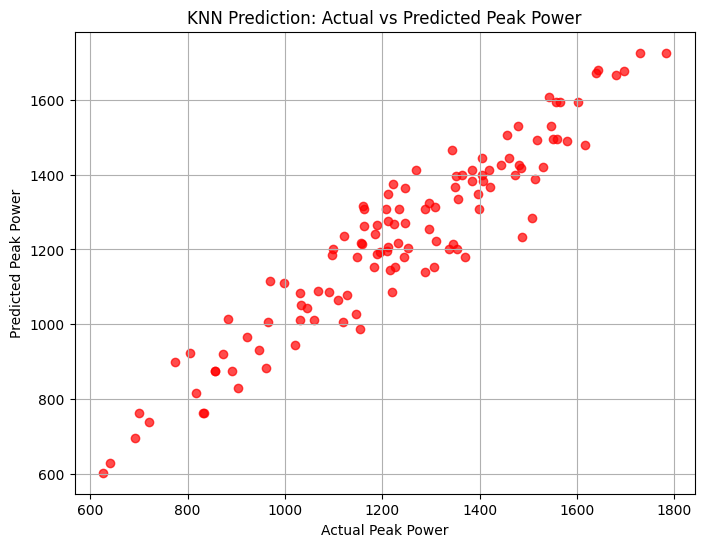

In [135]:
# Define features and target variable
X = peaks_df[['energy']]
y = peaks_df['peak_power']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Plot Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='red')
plt.xlabel('Actual Peak Power')
plt.ylabel('Predicted Peak Power')
plt.title('KNN Prediction: Actual vs Predicted Peak Power')
plt.grid(True)
plt.savefig("results/KNN_Prediction.jpg", dpi=300)  # Save as high-resolution JPG
plt.show()


# 6- Find Associations Between Temperature & Peaks Using Apriori

In [136]:
from mlxtend.frequent_patterns import apriori, association_rules
from IPython.display import display

In [137]:

# Drop NaN values in temperature columns before binning
peaks_df.dropna(subset=['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10'], inplace=True)

# Convert temperature columns to numeric
for col in ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10']:
    peaks_df[col] = pd.to_numeric(peaks_df[col], errors='coerce')  # Converts invalid values to NaN

# Check for and handle any remaining NaN values
peaks_df.dropna(subset=['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10'], inplace=True)

# Convert temperature values into categorical bins (low, medium, high)
for col in ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10']:
    print(f"Processing column: {col}")
    
    # Check the unique values in each column
    unique_vals = peaks_df[col].unique()
    print(f"Unique values in {col}: {unique_vals}")
    
    # If the column has very few unique values, handle them differently
    if len(unique_vals) < 3:
        print(f"Warning: Column {col} has less than 3 unique values. Skipping binning for this column.")
        peaks_df[col] = 'Medium'  # Default to 'Medium' if there are not enough unique values
    else:
        min_val = peaks_df[col].min()
        q1 = peaks_df[col].quantile(0.33)
        q2 = peaks_df[col].quantile(0.66)
        max_val = peaks_df[col].max()

        # Create bin edges and ensure they are unique and sorted
        bin_edges = sorted(set([min_val, q1, q2, max_val]))

        # If there are not enough distinct bin edges, adjust or fallback
        if len(bin_edges) < 3:
            # Fallback: split range in half if there are too few distinct bin edges
            bin_edges = [min_val, (min_val + max_val) / 2, max_val]

        # Ensure that the bins are strictly increasing (remove duplicates and ensure order)
        bin_edges = sorted(list(set(bin_edges)))  # Remove duplicates

        # Enforce strictly increasing bin edges by checking for consecutive duplicates
        for i in range(1, len(bin_edges)):
            if bin_edges[i] <= bin_edges[i-1]:
                bin_edges[i] = bin_edges[i-1] + 1e-5  # Slightly increase to make it strictly increasing

        # Check if bin edges are valid
        if bin_edges[0] == bin_edges[-1]:
            print(f"Warning: All bin edges are equal in column {col}. Skipping binning for this column.")
            peaks_df[col] = 'Medium'  # Default to 'Medium' if binning fails
        else:
            # If there are at least 3 bins, categorize the temperatures
            peaks_df[col] = pd.cut(peaks_df[col], bins=bin_edges, labels=['Low', 'Medium', 'High'], include_lowest=True)

# Convert categorical values into one-hot encoding
encoded_df = pd.get_dummies(peaks_df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'is_peak']])

# Verify the encoding result
if encoded_df.sum().sum() == 0:
    print("Warning: Encoded data is empty. Check your data or encoding process.")
else:
    print(f"Data successfully encoded with {encoded_df.shape[0]} rows and {encoded_df.shape[1]} columns.")

# Apply Apriori Algorithm with a lower min_support threshold
frequent_itemsets = apriori(encoded_df, min_support=0.3, use_colnames=True)  # Lowered min_support to 0.3

# Check if frequent itemsets were found
if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering min_support further or check data quality.")

# Apply association rules only if itemsets are found
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
    
    # Select only relevant columns and sort by confidence
    rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    rules = rules.sort_values(by='confidence', ascending=False)
    
    # Convert sets to strings for better readability
    rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

    # Display top 20 strongest rules in Jupyter
    display(rules.head(20))

    # Save filtered results to CSV
    rules.to_csv("results/filtered_association_rules.csv", index=False)

    print(f"Saved {len(rules)} rules to 'filtered_association_rules.csv'")


Processing column: T1
Unique values in T1: [16.8  14.81 14.74 14.75 16.86 14.04 16.09 15.95 17.98 17.14 17.5  18.22
 16.93 17.89 17.1  18.82 19.11 17.71 19.76 20.79 17.26 20.82 12.29 13.1
 15.77 14.62 16.92 15.54 15.57 20.51 18.66 19.88 20.6  17.61 17.23 17.19
 17.52 15.59 16.68 18.38 17.56 18.95 17.65 21.69 20.11 18.62 16.29 16.7
 17.48 18.36 19.12 19.97 16.6  19.53 21.01 20.91 17.32 20.24 19.73 26.92
 23.15 26.36 22.52 23.23 23.64 25.98 21.   19.26 20.35 20.54 19.1  21.61
 18.11 19.28 17.44 21.19 18.68 21.24 21.84 21.33 22.82 22.84 19.13 18.21
 18.12 13.92 16.9  19.55 15.26 20.14 15.63 18.14 14.95 13.29 16.65 13.91
 17.72 15.1  15.05 14.64 15.02 16.24 19.93 18.55 16.05 15.88 21.23 20.16
 17.35 14.77 21.16 10.43  8.02  8.57 15.67 11.06 10.29 16.99 16.67 16.64
 15.81 17.29 14.79 17.   16.14 25.04 25.06 19.9  13.15 18.57 17.45 22.2
 20.95 19.87 18.92 17.83 19.44 16.54 18.07 20.87 23.14 21.25 22.79 22.38
 20.69 18.   24.07 20.76 20.8  18.41 19.6  18.7  17.59 14.24 16.23 15.92
 11.89 19.3

,antecedents,consequents,support,confidence,lift
29,"T2_Low, T4_Low",T3_Low,0.302207,0.988889,2.986952
36,"T4_High, T2_High",T3_High,0.300509,0.972527,2.864093
30,"T3_Low, T4_Low",T2_Low,0.302207,0.967391,2.922018
5,T3_Low,T2_Low,0.317487,0.958974,2.896594
4,T2_Low,T3_Low,0.317487,0.958974,2.896594
28,"T2_Low, T3_Low",T4_Low,0.302207,0.951872,2.845951
34,"T3_High, T4_High",T2_High,0.300509,0.946524,2.787513
12,T3_Low,T4_Low,0.312394,0.943590,2.821190
35,"T3_High, T2_High",T4_High,0.300509,0.941489,2.772686
8,T3_High,T2_High,0.319185,0.940000,2.768300


Saved 40 rules to 'filtered_association_rules.csv'


# 7- Filtering Rules Based on Confidence and Lift

In [138]:
# Load the rules data if not already loaded
rules_df = pd.read_csv('results/filtered_association_rules.csv')

# Set thresholds for confidence and lift
confidence_threshold = 0.7  # Example threshold for confidence
lift_threshold = 2.5  # Example threshold for lift

# Filter rules based on the thresholds
filtered_rules = rules_df[(rules_df['confidence'] >= confidence_threshold) & 
                           (rules_df['lift'] >= lift_threshold)]

# Display the filtered rules
filtered_rules.head()


,antecedents,consequents,support,confidence,lift
0,"T2_Low, T4_Low",T3_Low,0.302207,0.988889,2.986952
1,"T4_High, T2_High",T3_High,0.300509,0.972527,2.864093
2,"T3_Low, T4_Low",T2_Low,0.302207,0.967391,2.922018
3,T3_Low,T2_Low,0.317487,0.958974,2.896594
4,T2_Low,T3_Low,0.317487,0.958974,2.896594


# 8- Visualizing the Rules

In [139]:
import seaborn as sns

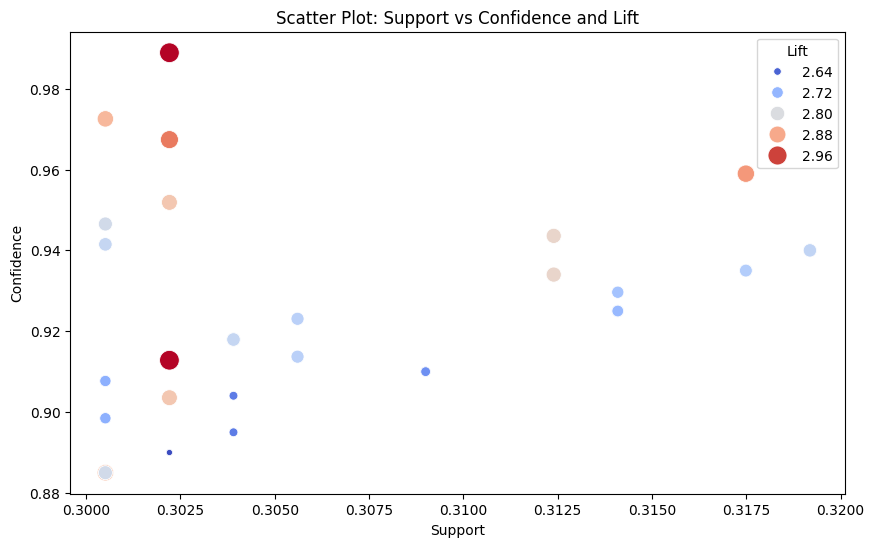

In [140]:

# Plotting a scatter plot for Support vs Confidence and Lift
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules_df, x='support', y='confidence', hue='lift', palette='coolwarm', size='lift', sizes=(20, 200))
plt.title('Scatter Plot: Support vs Confidence and Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper right')
plt.savefig("results/Support_vs_Confidence_vs_Lift.jpg", dpi=300)  # Save as high-resolution JPG
plt.show()


In [141]:
import networkx as nx

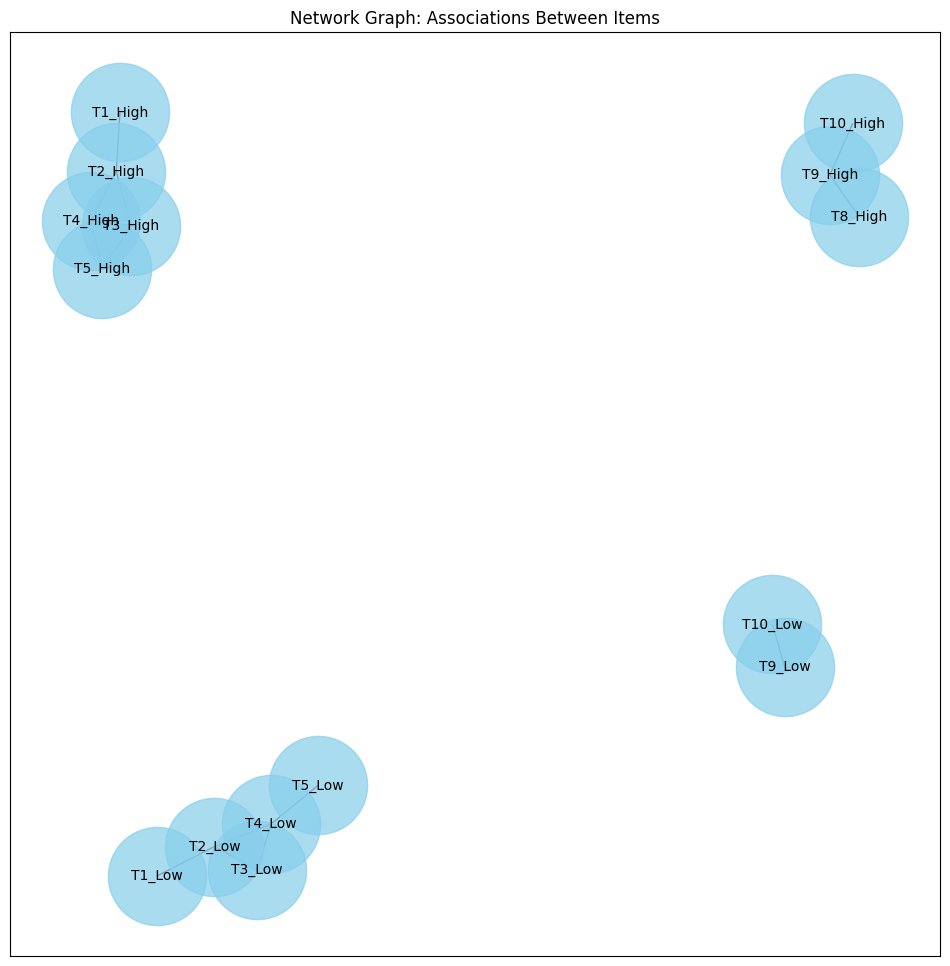

In [142]:

# Create a graph from the antecedents and consequents
G = nx.Graph()

# Add nodes and edges based on the rules
for _, row in rules_df.iterrows():
    antecedents = row['antecedents'].split(',')
    consequents = row['consequents'].split(',')
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent.strip(), consequent.strip(), weight=row['lift'])

# Plot the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title('Network Graph: Associations Between Items')
plt.savefig("results/Associations_Between_Items.jpg", dpi=300)  # Save as high-resolution JPG
plt.show()
